In [1]:
import gensim.models.word2vec as w2v
import codecs 
import os 
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import glob
import re
import seaborn as sns
import multiprocessing
import sklearn.manifold
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) #lets log everything 

Populating the interactive namespace from numpy and matplotlib


In [2]:

hunger_corpus = sorted(glob.glob("/home/codejunky237/ml/word2vec/word2vecdoc/hungergames/*.txt"))
print(len(hunger_corpus))
print(type(hunger_corpus))
print(hunger_corpus[3])

4
<class 'list'>
/home/codejunky237/ml/word2vec/word2vecdoc/hungergames/(3.2) Mockingjay.txt


In [3]:
corpus = u""
for corpus in hunger_corpus:
    with codecs.open(corpus,"r","utf-8") as corp:
            corpus += corp.read()
     
    print(type(corpus))
   


        

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [4]:
import nltk

In [5]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /home/codejunky237/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codejunky237/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenized_sentences = tokenizer.tokenize(corpus)
print(tokenized_sentences)

['/home/codejunky237/ml/word2vec/word2vecdoc/hungergames/(3.2) Mockingjay.txt9.', 'I stop trying to sleep after my first few attempts are\r\ninterrupted by unspeakable nightmares.', 'After that, I just lie\r\nstill and do fake breathing whenever someone checks on\r\nme.', "In the morning, I'm released from the hospital and\r\ninstructed to take it easy.", 'Cressida asks me to record a\r\nfew lines for a new Mockingjay propo.', "At lunch, I keep\r\nwaiting for people to bring up Peeta's appearance, but no\r\none does.", 'Someone must have seen it besides Finnick\r\nand me.', "I have training, but Gale's scheduled to work with\r\nBeetee on weapons or something, so I get permission to\r\ntake Finnick to the woods.", 'We wander around awhile and\r\nthen ditch our communicators under a bush.', "When we're a\r\nsafe distance away, we sit and discuss Peeta's broadcast.", '"I haven\'t heard one word about it.', 'No one\'s told you\r\nanything?"', 'Finnick says.', 'I shake my head.', 'He pauses

In [7]:
def clean_text(text):
    re.sub("[^a-zA-Z]"," ",text)
    text = text.replace('\n',"")
    text = text.replace('\r',"")
    text = text.replace(" you\'re", "you are")
    text = text.replace("I\'m"," i am")
    text = text.replace("haven\'t", "have not")
    text = text.replace("don\'t","do not")
    text = text.replace("What\'s","What is")
    text = text.replace("one\'s","one is")
    text = text.replace("haven\'t", "have not")

    text = text.replace("didn\'t","did not")
    text = text.replace("It\'s","It is")
    text = text.replace("That\'s","That is")
    text = text.replace("couldn\'t","could not")
    text = text.replace("it\'s","it is")
    text = text.replace("we\'d","we would")
    text = text.replace("I\'ll","I will")
    text = text.replace("wasn\'t","was not")
    text = text.replace("You\'re","You are")
    text = text.replace("what\'s","what is")
    text = text.replace("Haven\'t", "Have not")
    text = text.split()
    
    return text
corpus_clean = []
for sentence in tokenized_sentences:
    if len(sentence) > 0:
        corpus_clean.append(clean_text(sentence))
print(corpus_clean[8]) 

    

['We', 'wander', 'around', 'awhile', 'andthen', 'ditch', 'our', 'communicators', 'under', 'a', 'bush.']


In [8]:
num_features = 300 # less dimensionality easy to train 
min_word_count = 3
num_workers = multiprocessing.cpu_count() #number of workers 

context_window = 7 # number of surrounding names for each selected word
down_sampling = 1e-3 #reducing sample size
seed = 1
hungergames = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_window,
    sample=down_sampling
)


In [9]:
hungergames.build_vocab(corpus_clean)

2018-06-22 17:37:43,051 : INFO : collecting all words and their counts
2018-06-22 17:37:43,054 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-22 17:37:43,089 : INFO : collected 16008 word types from a corpus of 66922 raw words and 6690 sentences
2018-06-22 17:37:43,092 : INFO : Loading a fresh vocabulary
2018-06-22 17:37:43,118 : INFO : min_count=3 retains 2735 unique words (17% of original 16008, drops 13273)
2018-06-22 17:37:43,119 : INFO : min_count=3 leaves 51845 word corpus (77% of original 66922, drops 15077)
2018-06-22 17:37:43,140 : INFO : deleting the raw counts dictionary of 16008 items
2018-06-22 17:37:43,143 : INFO : sample=0.001 downsamples 56 most-common words
2018-06-22 17:37:43,145 : INFO : downsampling leaves estimated 37932 word corpus (73.2% of prior 51845)
2018-06-22 17:37:43,164 : INFO : estimated required memory for 2735 words and 300 dimensions: 7931500 bytes
2018-06-22 17:37:43,167 : INFO : resetting layer weights


In [10]:
print("hungergames vocabulary length:", len(hungergames.wv.vocab))

hungergames vocabulary length: 2735


In [11]:
hungergames.train(corpus_clean,total_examples=hungergames.corpus_count,epochs=20)

2018-06-22 17:37:47,963 : INFO : training model with 4 workers on 2735 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-06-22 17:37:48,220 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-22 17:37:48,294 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-22 17:37:48,320 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-22 17:37:48,332 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-22 17:37:48,334 : INFO : EPOCH - 1 : training on 66922 raw words (37974 effective words) took 0.4s, 107682 effective words/s
2018-06-22 17:37:48,545 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-22 17:37:48,620 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-22 17:37:48,636 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-22 17:37:48,647 : INFO : worker thread finished; awaiting finish of 0 mor

2018-06-22 17:37:54,166 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-22 17:37:54,175 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-22 17:37:54,178 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-22 17:37:54,181 : INFO : EPOCH - 17 : training on 66922 raw words (38023 effective words) took 0.3s, 113134 effective words/s
2018-06-22 17:37:54,461 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-22 17:37:54,501 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-22 17:37:54,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-22 17:37:54,524 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-22 17:37:54,526 : INFO : EPOCH - 18 : training on 66922 raw words (37956 effective words) took 0.3s, 114885 effective words/s
2018-06-22 17:37:54,724 : INFO : worker thread finished; awaiting finish of 3 more threads
2018

(758892, 1338440)

In [12]:
hungergames.most_similar("Katniss")

/home/codejunky237/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-06-22 17:37:59,857 : INFO : precomputing L2-norms of word weight vectors


[('Everdeen.', 0.9393479824066162),
 ('"My', 0.9331067204475403),
 ('Johanna.', 0.9224172830581665),
 ('Prim.', 0.9207773208618164),
 ('1.', 0.9117255210876465),
 ('work.', 0.9068588614463806),
 ('meanshe', 0.9055971503257751),
 ('Very', 0.902475893497467),
 ('"Whatever', 0.9021097421646118),
 ('"Not', 0.9006289839744568)]

In [41]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = hungergames.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

nearest_similarity_cosmul("Katniss","Peeta","Games")

Katniss is related to Peeta, as Hunger is related to Games


/home/codejunky237/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'Hunger'

In [13]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [14]:
word_2_vector = hungergames.wv.syn0

/home/codejunky237/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [15]:
all_word_vectors_matrix_2d = tsne.fit_transform(word_2_vector)

In [16]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[hungergames.wv.vocab[word].index])
            for word in hungergames.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [17]:
points.head(100)

,word,x,y
0,I,-11.867520,17.061346
1,stop,-3.503597,5.258628
2,trying,-6.976114,0.934224
3,to,-1.317346,6.660808
4,sleep,-3.917807,-8.695805
5,after,-20.873919,45.917095
6,my,23.281019,-49.772118
7,first,11.627623,13.826328
8,few,33.891640,2.720575
9,attempts,37.381897,-17.493996


In [36]:
sns.set_context("poster")

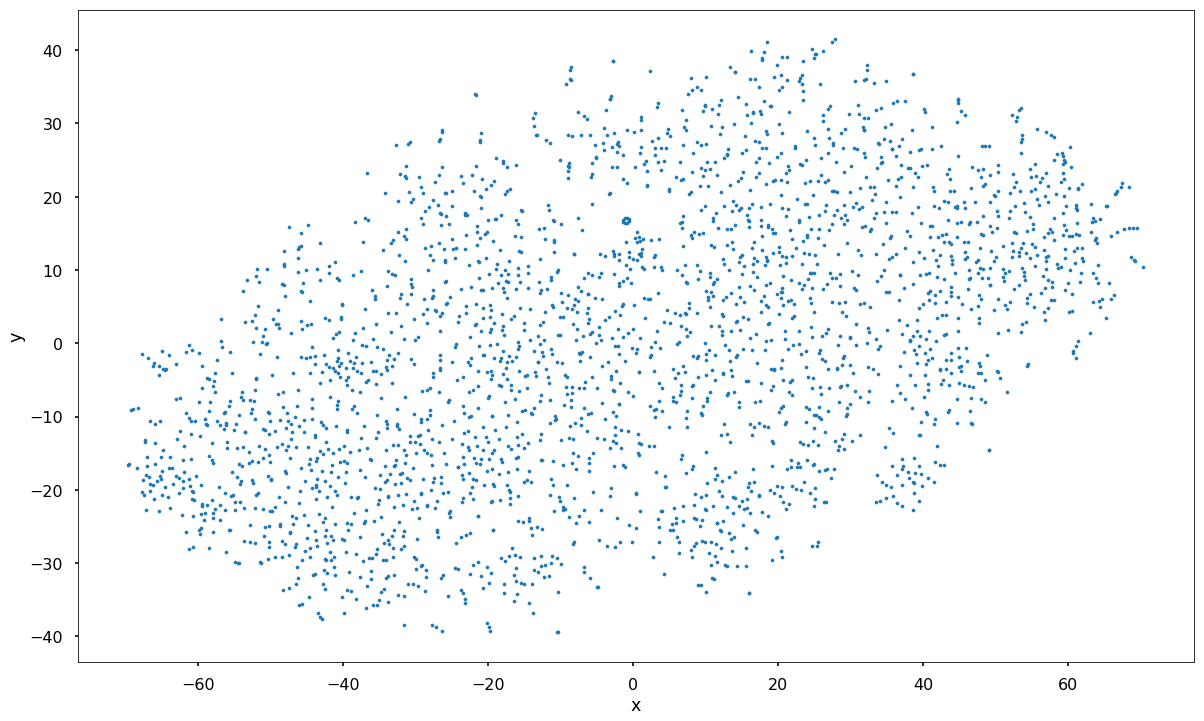

In [37]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [18]:

type(points)

pandas.core.frame.DataFrame

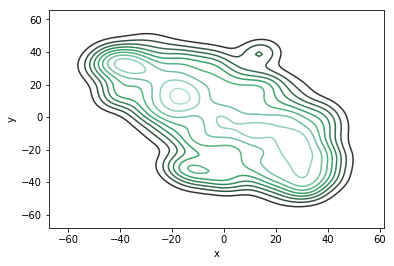

In [20]:
sns.kdeplot(points.x,points.y)

In [28]:
sns.set_style('whitegrid')

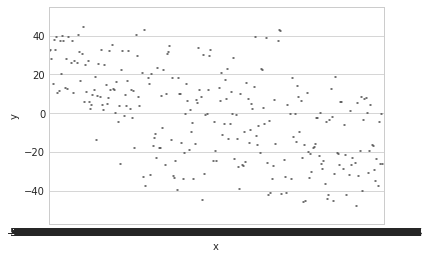

In [30]:
sns.violinplot(x=points.x, y=points.y, data=points)

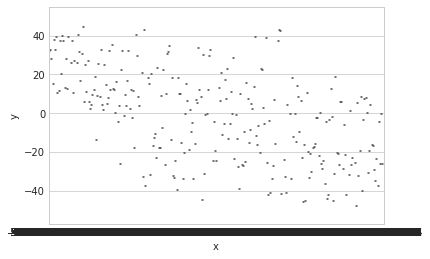

In [32]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x=points.x, y=points.y, data=points, 
               palette=pkmn_type_colors)